## Many to one 

In [1]:
### importing the libraries
import pandas as pd
import numpy as np

In [2]:
### setting up the src system path
import sys
sys.path.append('../')

In [3]:
### importing the functions
from src.graphs.graphs_metrices import plot_predictions, plot_graphs_post_scaling, metrices

In [4]:
### loading the data
df = pd.read_csv('../stocks/apple-18-2.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [5]:
### targeting the features ['close', 'high', 'low', 'open']
features_to_target = ['close', 'high', 'low', 'open']
features_to_target

['close', 'high', 'low', 'open']

In [6]:
### changing the dtype of the 'date'
df['date'] = df['date'].astype(dtype = 'date64[pyarrow]')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [7]:
### creating the df_copy
df_copy = df.copy()
df_copy.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [8]:
### scaling the target features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df[features_to_target] = scaler.fit_transform(df[features_to_target])
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19,0.079550,0.061271,0.075349,0.067057,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22,0.056763,0.055386,0.056197,0.053718,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23,0.055938,0.037493,0.013047,0.028295,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24,0.052935,0.030656,0.036028,0.035353,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25,0.027263,0.035998,0.025914,0.033798,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


feature : close


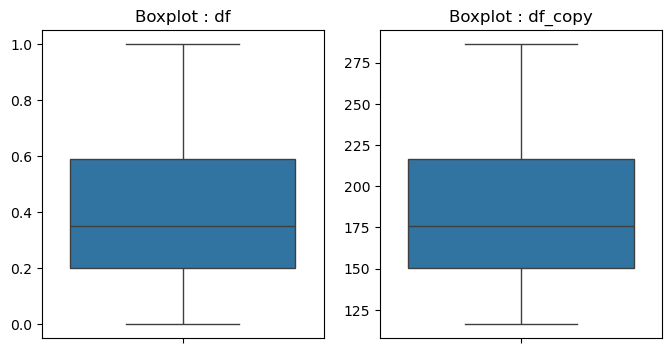

feature : high


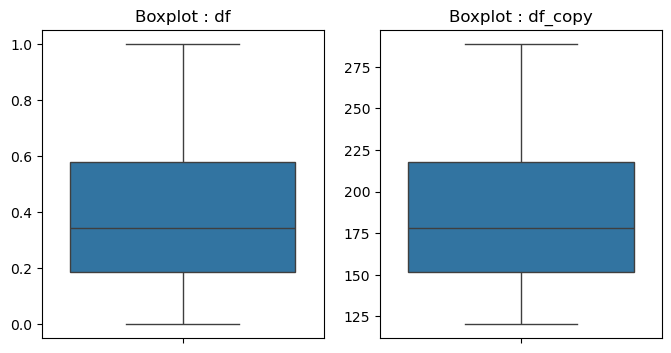

feature : low


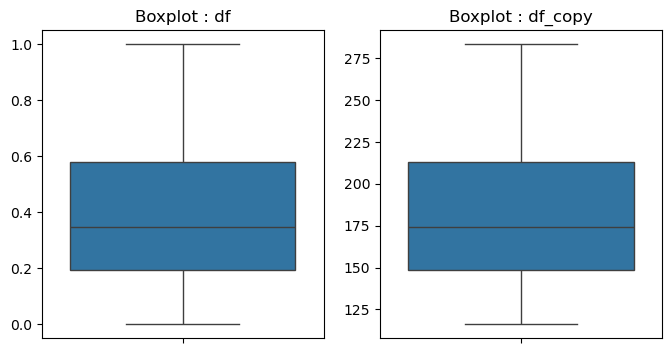

feature : open


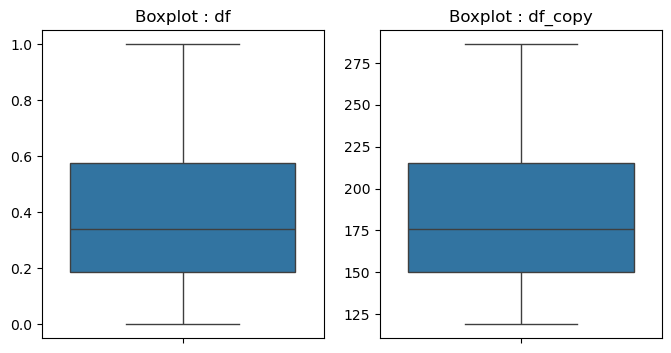

In [9]:
### plotting the pre and post scaling graphs for the target features
plot_graphs_post_scaling(df, df_copy, features_to_target)

In [19]:
### making the LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [23]:
### making the sequential model
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (60, 4)),
    Dropout(0.33),
    Bidirectional(LSTM(100)),
    Dropout(0.33),
    Dense(1, activation = 'linear'),
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,001 (515.63 KB)

 Trainable params: 132,001 (515.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
### creating the sequences
X, y_close = [], []
days = 60

for i in range(len(df) - days) : 

    X.append(df[features_to_target][i : i + days])
    y_close.append(df[features_to_target[0]][i + days])

X = np.array(X)
y_close = np.array(y_close)

In [15]:
### checking out the shape
print(f"{X.shape} :: {y_close.shape}")

(1195, 60, 4) :: (1195,)


In [16]:
### reshaping the y_close
y_close = y_close.reshape(-1, 1)
y_close.shape

(1195, 1)

In [17]:
### making the train and the test sequence (80-20 of the size)
test_size = int(len(df) * 0.80)
X_train, X_test = X[ : test_size], X[test_size : ]
y_train_close, y_test_close = y_close[ : test_size], y_close[test_size : ]

In [18]:
### checking out the shape of traind and test size
print(f"{X_train.shape} :: {y_train_close.shape} \n{X_test.shape} :: {y_test_close.shape}")

(1004, 60, 4) :: (1004, 1) 
(191, 60, 4) :: (191, 1)


In [25]:
### training the model
model.fit(X_train, y_train_close, batch_size = 32, epochs = 20, verbose = 1)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0527 - mse: 0.0527
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0048 - mse: 0.0048
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0040 - mse: 0.0040
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0034 - mse: 0.0034
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030 - mse: 0.0030
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0030 - mse: 0.0030
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0025 - mse: 0.0025
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0028 - mse: 0.0028
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0029 - mse: 0.0029
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0024 - mse: 0.0024
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026 - mse: 0.0026
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026 - mse: 0.0026
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━

In [26]:
### predicting the y_pred_close
y_pred_close = model.predict(X_test)
y_train_close

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


array([[0.05835247],
       [0.04999117],
       [0.04904905],
       ...,
       [0.55602661],
       [0.56862745],
       [0.56509451]])